In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
from sklearn.metrics import accuracy_score

In [63]:
df = pd.read_csv('MadaLine.csv', header=None)
df

,0,1,2
0,-0.642823,0.720606,0.0
1,-0.218126,0.677263,0.0
2,-0.582930,-0.347496,0.0
3,0.285127,0.091750,0.0
4,-0.335577,-0.313893,0.0
...,...,...,...
195,0.744066,-1.206548,1.0
196,-0.457547,1.286227,1.0
197,-1.020000,-0.783926,1.0
198,1.363429,-0.800250,1.0


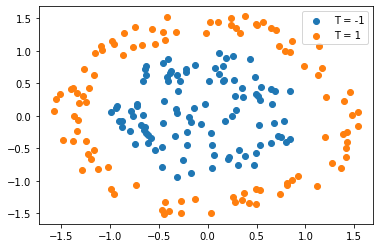

In [64]:
dfs = df.copy(deep=True)
df[df.iloc[:, 2] == 0]
plt.scatter(df[df.iloc[:, 2] == 0].iloc[:, 0], df[df.iloc[:, 2] == 0].iloc[:, 1])
plt.scatter(df[df.iloc[:, 2] == 1].iloc[:, 0], df[df.iloc[:, 2] == 1].iloc[:, 1], cmap="r")
plt.legend(["T = -1", "T = 1"])
plt.show()
np.random.seed(42)

In [65]:
class Madaline():
    def __init__(self, num_l, n_iterations=1000, random_state=42, learning_rate=0.1):
        self.n_iterations = n_iterations
        self.random_state = random_state
        self.learning_rate = learning_rate
        self.weights = np.random.rand(num_l, 2)
        self.v = [1] * num_l
        self.b = np.random.rand(num_l, 1)
        self.b2 = num_l - 1

    def fit(self, X, Y):
        count = 0
        for iter in range(self.n_iterations):
            old_weights = copy.deepcopy(self.weights)
            for x, label in zip(X, Y):
                z_in = np.array([np.matmul(x, self.weights.T)]).T + self.b
                z = np.heaviside(z_in, 1) * 2 - 1
                y_in = np.dot(np.squeeze(z), np.squeeze(self.v)) + self.b2
                y = np.heaviside(y_in, 1) * 2 - 1
                if y != label:
                    if label == 1:
                        z_j = max(z_in)
                        ind = np.where(z_in == z_j)
                        self.weights[ind, :] = self.weights[ind, :] + self.learning_rate * (1 - z_in[ind]) * np.array(x)
                        self.b[ind] = self.b[ind] + self.learning_rate * (1 - z_in[ind])
                    else:
                        ind = [i for i, x in enumerate(z_in) if x > 0]
                        for indice in ind:
                            self.weights[indice, :] = self.weights[indice, :] + self.learning_rate * (
                                    -1 - z_in[indice]) * np.array(x)
                            self.b[indice] = self.b[indice] + self.learning_rate * (-1 - z_in[indice])
            if np.all((self.weights - old_weights) < 0.001) and iter > 10:
                count += 1
                if count > 10:
                    print("Total iterations with", len(self.b), "lines:", iter + 1)
                    break

    def predict(self, X):
        y = []
        for x in X:
            z_in = np.array([np.matmul(x, self.weights.T)]).T + self.b
            z = np.heaviside(z_in, 1) * 2 - 1
            y_in = np.dot(np.squeeze(z), np.squeeze(self.v)) + self.b2
            y.append(np.heaviside(y_in, 1) * 2 - 1)
        return y

In [66]:
df.iloc[:, 2].replace({0: -1}, inplace=True)
df = df.sample(frac=1, random_state=42)
X = np.array(list(zip(df.iloc[:, 0], df.iloc[:, 1])))

Accuracy of prediction is: 0.93


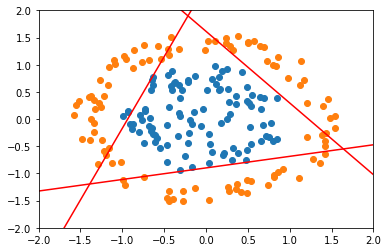

In [67]:
# change n to change number of neurons(lines)
n = 3
mada = Madaline(n)
mada.fit(X, df.iloc[:, 2])
pred = mada.predict(X)
acc = accuracy_score(pred, df.iloc[:, 2])
print("Accuracy of prediction is:", acc)
# print(mada.weights)
# print(mada.b)
for i in range(n):
    plt.axline((0, float(-mada.b[i] / mada.weights[i][1])), slope=-mada.weights[i][0] / mada.weights[i][1], color="r")
plt.scatter(dfs[dfs.iloc[:, 2] == 0].iloc[:, 0], dfs[dfs.iloc[:, 2] == 0].iloc[:, 1], cmap="b")
plt.scatter(dfs[dfs.iloc[:, 2] == 1].iloc[:, 0], dfs[dfs.iloc[:, 2] == 1].iloc[:, 1], cmap="r")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

Total iterations with 4 lines: 170
Accuracy of prediction is: 0.96


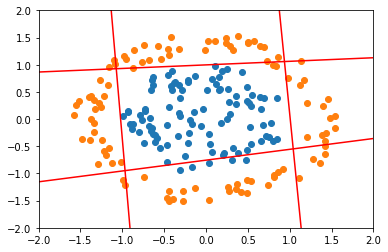

In [68]:
# change n to change number of neurons(lines)
n = 4
mada = Madaline(n)
mada.fit(X, df.iloc[:, 2])
pred = mada.predict(X)
acc = accuracy_score(pred, df.iloc[:, 2])
print("Accuracy of prediction is:", acc)
# print(mada.weights)
# print(mada.b)
for i in range(n):
    plt.axline((0, float(-mada.b[i] / mada.weights[i][1])), slope=-mada.weights[i][0] / mada.weights[i][1], color="r")
plt.scatter(dfs[dfs.iloc[:, 2] == 0].iloc[:, 0], dfs[dfs.iloc[:, 2] == 0].iloc[:, 1], cmap="b")
plt.scatter(dfs[dfs.iloc[:, 2] == 1].iloc[:, 0], dfs[dfs.iloc[:, 2] == 1].iloc[:, 1], cmap="r")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

Total iterations with 8 lines: 22
Accuracy of prediction is: 1.0


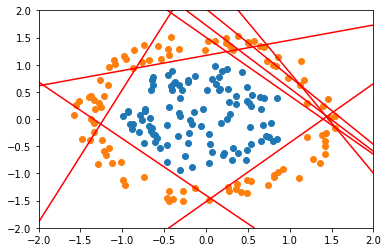

In [69]:
# change n to change number of neurons(lines)
n = 8
mada = Madaline(n)
mada.fit(X, df.iloc[:, 2])
pred = mada.predict(X)
acc = accuracy_score(pred, df.iloc[:, 2])
print("Accuracy of prediction is:", acc)
# print(mada.weights)
# print(mada.b)
for i in range(n):
    plt.axline((0, float(-mada.b[i] / mada.weights[i][1])), slope=-mada.weights[i][0] / mada.weights[i][1], color="r")
plt.scatter(dfs[dfs.iloc[:, 2] == 0].iloc[:, 0], dfs[dfs.iloc[:, 2] == 0].iloc[:, 1], cmap="b")
plt.scatter(dfs[dfs.iloc[:, 2] == 1].iloc[:, 0], dfs[dfs.iloc[:, 2] == 1].iloc[:, 1], cmap="r")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()